# **Modelo de Predicción del Abandono de Clientes en una Entidad Bancaria**

---


## *Carga de los datos*



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar el conjunto de datos que tengas
path = 'Churn_Data.csv'
data = pd.read_csv(path)

# Mostrar información básica sobre los datos
print(data.head())
print(data.info())
print(data.describe())

# Renombrar las columnas
nuevos_nombres = {
'RowNumber': 'NroFila',
'CustomerId': 'ClienteId',
'Surname': 'Apellido',
'CreditScore': 'PuntuacionCredito',
'Geography': 'Geografia',
'Gender': 'Genero',
'Age': 'Edad',
'Tenure': 'Tenencia',
'Balance': 'Saldo',
'NumOfProducts': 'NroProductos',
'HasCrCard': 'TieneTarjetaCredito',
'IsActiveMember': 'EsMiembroActivo',
'EstimatedSalary': 'SalarioEstimado',
'Exited': 'Churn'
}

data = data.rename(columns=nuevos_nombres)
data

   RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargraven          619    France  Female   42   
1          2    15647311       Hill          608     Spain  Female   41   
2          3    15619304       Onio          502    France  Female   42   
3          4    15701354       Boni          699    France  Female   39   
4          5    15737888   Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

,NroFila,ClienteId,Apellido,PuntuacionCredito,Geografia,Genero,Edad,Tenencia,Saldo,NroProductos,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Churn
0,1,15634602,Hargraven,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## *Análisis Exploratorio de Datos*

NroFila                  int64
ClienteId                int64
Apellido                object
PuntuacionCredito        int64
Geografia               object
Genero                  object
Edad                     int64
Tenencia                 int64
Saldo                  float64
NroProductos             int64
TieneTarjetaCredito      int64
EsMiembroActivo          int64
SalarioEstimado        float64
Churn                    int64
dtype: object
Variables Categóricas:
['Apellido', 'Geografia', 'Genero']


c:\Users\Enrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Enrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Enrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Enrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

Distribución de NroProductos y de TieneTarjetaCredito:
NroProductos
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
TieneTarjetaCredito
1    7055
0    2945
Name: count, dtype: int64


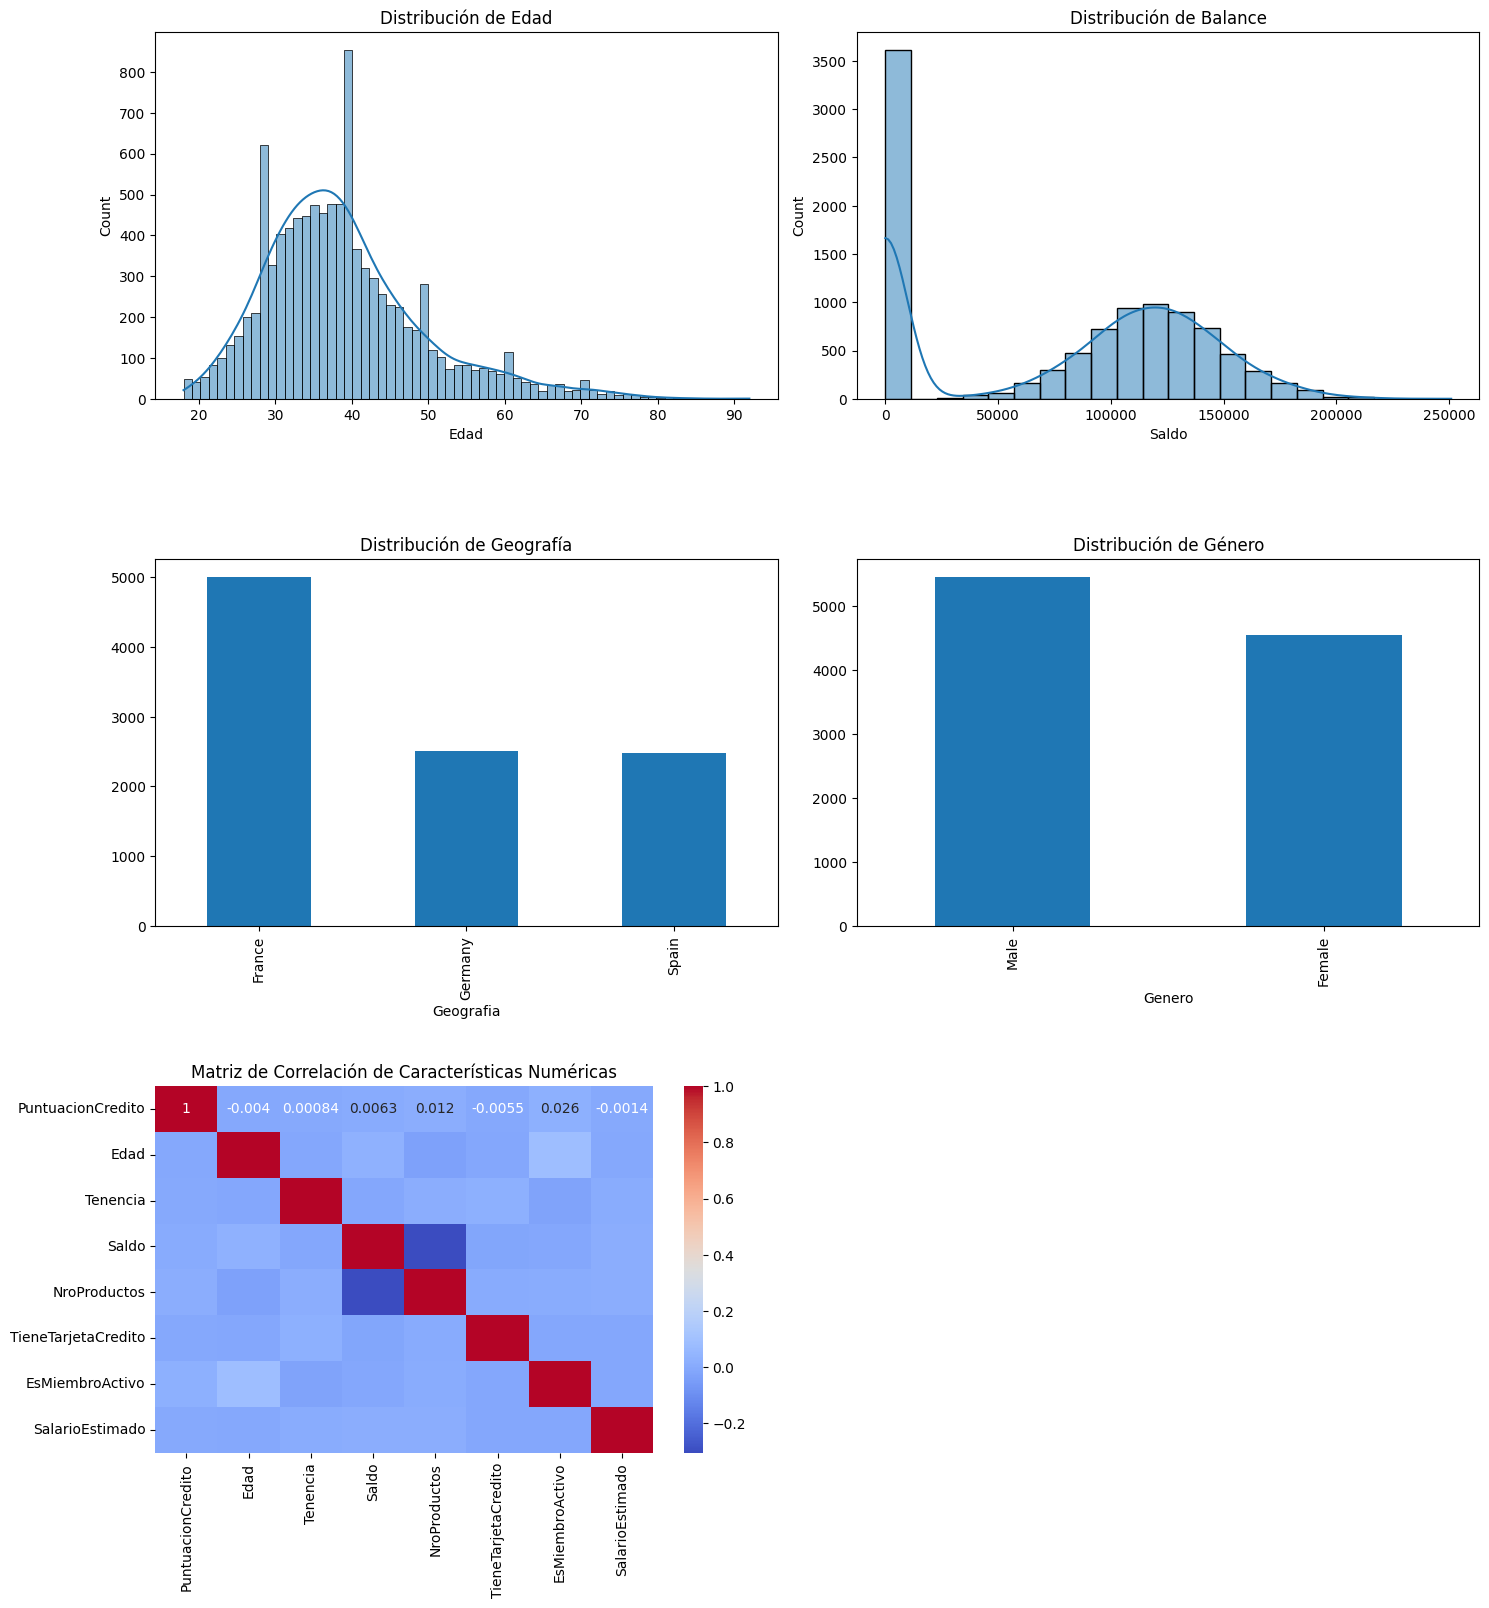

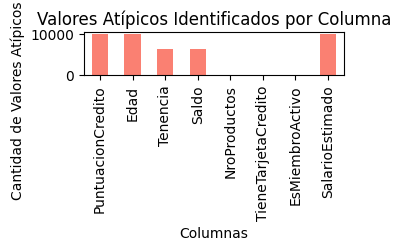

In [5]:
# Definir columnas numéricas
numeric_features = ['PuntuacionCredito', 'Edad', 'Tenencia', 'Saldo', 'NroProductos', 'TieneTarjetaCredito', 'EsMiembroActivo', 'SalarioEstimado']

# Mostrar tipos de datos y variables categóricas
print(data.dtypes)
print("Variables Categóricas:")
print(data.select_dtypes(include=['object']).columns.tolist())

# Análisis exploratorio con visualizaciones detalladas
plt.figure(figsize=(15, 20))

# Distribución de Edad
plt.subplot(4, 2, 1)
sns.histplot(data['Edad'], kde=True)
plt.title('Distribución de Edad')

# Distribución de Balance
plt.subplot(4, 2, 2)
sns.histplot(data['Saldo'], kde=True)
plt.title('Distribución de Balance')

# Visualización de Geografía
plt.subplot(4, 2, 3)
data['Geografia'].value_counts().plot(kind='bar')
plt.title('Distribución de Geografía')

# Visualización de Género
plt.subplot(4, 2, 4)
data['Genero'].value_counts().plot(kind='bar')
plt.title('Distribución de Género')

print("Distribución de NroProductos y de TieneTarjetaCredito:")
print(data['NroProductos'].value_counts())
print(data['TieneTarjetaCredito'].value_counts())


# Matriz de correlación de características numéricas
plt.subplot(4, 2, 5)
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Características Numéricas')

plt.tight_layout()
plt.show()

# Crear un gráfico de barras para mostrar valores atípicos identificados
initial_outliers = (data[numeric_features] > 3).sum()
plt.subplot(4, 2, 7)
initial_outliers.plot(kind='bar', color='salmon')
plt.title('Valores Atípicos Identificados por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Atípicos Identificados')

plt.tight_layout()
plt.show()

Conclusiones: Existen 2 factores fundamentales extraidos a partir del conocimiento que se tiene sobre los datos y las columnas, y su relevancia de acuerdo al análisis que se debe hacer para utilizar un modelo de predicción en una entidad bancaria, y ambos puntos los decribiremos a continuación:
1. La existencia de variables numéricas y categóricas: se concluye que se deben identificar cuales son las variables numéricas y categóricas para realizar las transformaciones de escalado y de opciones binarias correspondientemente.
2. La identificación de valores atípicos: se concluye que existen correlaciones inexistentes en algunos parámetros y esto convierte a dichos parámetros en descartables por su ausencia de relevancia en el modelo.

## *Limpieza y tratamiento de datos*

### Valores faltantes

In [ ]:
# Manejar valores faltantes (en este caso, simplemente los eliminamos)
initial_missing_values = data.isnull().sum()
initial_outliers = (data[numeric_features] > 3).sum()

# Crear un gráfico de barras para mostrar valores faltantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
initial_missing_values.plot(kind='bar', color='skyblue')
plt.title('Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')

### Valores duplicados

In [ ]:
# Eliminar duplicados en todo el DataFrame
data_sin_duplicados = data.drop_duplicates()

# Calcular el número de filas eliminadas (datos duplicados)
filas_eliminadas = len(data) - len(data_sin_duplicados)

# Crear una figura con dos subtramas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Gráfico antes de eliminar duplicados
plt.bar(['Antes'], [len(data)], color='lightblue', label='Antes de Eliminar Duplicados')
plt.ylabel('Cantidad de Filas')
plt.title('Cantidad de Filas Antes de Eliminar Duplicados')

plt.subplot(1, 2, 2)

# Gráfico después de eliminar duplicados
plt.bar(['Después'], [len(data_sin_duplicados)], color='salmon', label='Después de Eliminar Duplicados')
plt.ylabel('Cantidad de Filas')
plt.title('Cantidad de Filas Después de Eliminar Duplicados')

plt.tight_layout()
plt.show()

print(f"Número de filas eliminadas (datos duplicados): {filas_eliminadas}")


### Eliminar Valores Atípicos

## *Preprocesamiento de Datos*

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir columnas numéricas y categóricas
numeric_features = ['PuntuacionCredito', 'Edad', 'Tenencia', 'Saldo', 'NroProductos', 'TieneTarjetaCredito', 'EsMiembroActivo', 'SalarioEstimado']
categorical_features = ['Geografia', 'Genero']

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un transformador para aplicar escalado a las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear un transformador para aplicar codificación one-hot a las variables categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crear una transformación de columnas combinando los transformadores numéricos y categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar la transformación a los datos de entrenamiento y prueba
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Obtener las categorías únicas de las columnas categóricas después de la codificación one-hot
categorical_encoder = preprocessor.named_transformers_['cat']['onehot']
categorical_column_names = categorical_encoder.get_feature_names_out(input_features=categorical_features)

# Unir los nombres de columnas numéricas y categóricas después de la transformación
feature_names = numeric_features + list(categorical_column_names)

# Crear un DataFrame con las características preprocesadas y los nombres de las columnas
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_train_preprocessed_df

,PuntuacionCredito,Edad,Tenencia,Saldo,NroProductos,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Geografia_France,Geografia_Germany,Geografia_Spain,Genero_Female,Genero_Male
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,1.0,0.0,0.0,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,0.0,1.0,0.0,0.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,0.0,0.0,1.0,0.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,1.0,0.0,0.0,1.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.207474,1.435808,1.039728,-0.102301,-0.916688,0.649203,0.974817,-0.539860,1.0,0.0,0.0,0.0,1.0
7996,0.314989,1.816097,-1.389442,-1.218471,-0.916688,0.649203,0.974817,-1.733882,1.0,0.0,0.0,1.0,0.0
7997,0.865009,-0.085351,-1.389442,-1.218471,2.533560,-1.540351,-1.025834,-0.142765,1.0,0.0,0.0,1.0,0.0
7998,0.159323,0.390011,1.039728,1.827259,-0.916688,0.649203,-1.025834,-0.050826,1.0,0.0,0.0,0.0,1.0


### Valores faltantes

Text(0, 0.5, 'Cantidad de Valores Faltantes')

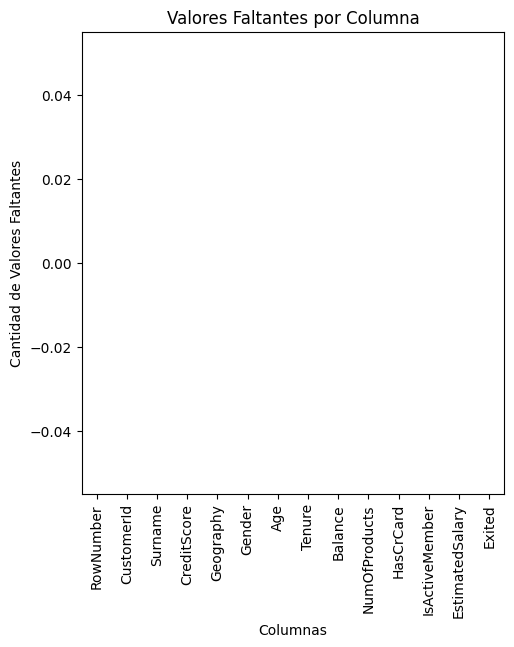

In [5]:
# Manejar valores faltantes (en este caso, simplemente los eliminamos)
initial_missing_values = data.isnull().sum()
initial_outliers = (data[numeric_features] > 3).sum()

# Crear un gráfico de barras para mostrar valores faltantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
initial_missing_values.plot(kind='bar', color='skyblue')
plt.title('Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')

### Valores Duplicados

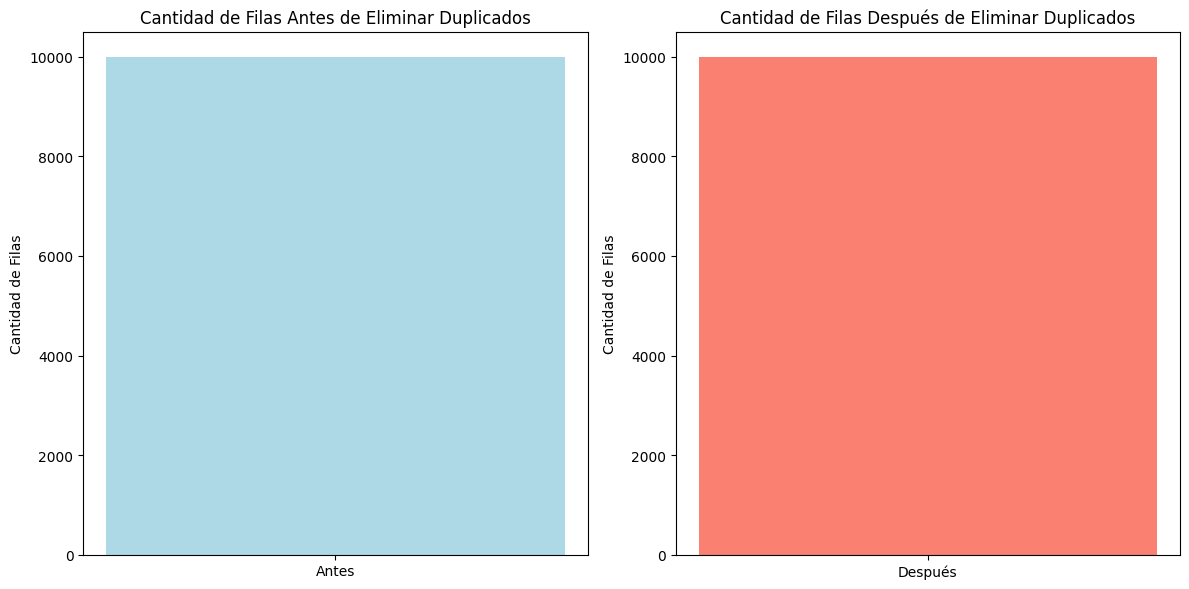

Número de filas eliminadas (datos duplicados): 0


In [6]:
# Eliminar duplicados en todo el DataFrame
data_sin_duplicados = data.drop_duplicates()

# Calcular el número de filas eliminadas (datos duplicados)
filas_eliminadas = len(data) - len(data_sin_duplicados)

# Crear una figura con dos subtramas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Gráfico antes de eliminar duplicados
plt.bar(['Antes'], [len(data)], color='lightblue', label='Antes de Eliminar Duplicados')
plt.ylabel('Cantidad de Filas')
plt.title('Cantidad de Filas Antes de Eliminar Duplicados')

plt.subplot(1, 2, 2)

# Gráfico después de eliminar duplicados
plt.bar(['Después'], [len(data_sin_duplicados)], color='salmon', label='Después de Eliminar Duplicados')
plt.ylabel('Cantidad de Filas')
plt.title('Cantidad de Filas Después de Eliminar Duplicados')

plt.tight_layout()
plt.show()

print(f"Número de filas eliminadas (datos duplicados): {filas_eliminadas}")


### Eliminar Valores Atípicos

## *Selección del Modelo*

### Entrenamiento y Comparativa de Modelos

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenar y evaluar un modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train_preprocessed, y_train)

y_pred_logistic = logistic_model.predict(X_test_preprocessed)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print("Resultados del modelo de Regresión Logística:")
print(f"Precisión: {accuracy_logistic:.2f}")
print(report_logistic)

# Entrenar y evaluar un modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

y_pred_rf = rf_model.predict(X_test_preprocessed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("\nResultados del modelo de Bosques Aleatorios:")
print(f"Precisión: {accuracy_rf:.2f}")
print(report_rf)

Resultados del modelo de Regresión Logística:
Precisión: 0.81
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Resultados del modelo de Bosques Aleatorios:
Precisión: 0.86
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### Visualizar el resultado de la selección de modelo:

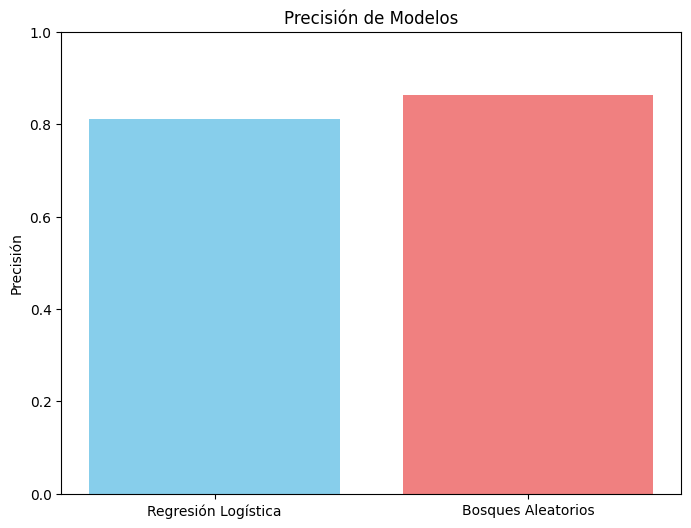

In [13]:
# Resultados de precisión de los modelos
accuracy_scores = [accuracy_logistic, accuracy_rf]
models = ['Regresión Logística', 'Bosques Aleatorios']

# Crear una gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral'])
plt.title('Precisión de Modelos')
plt.ylabel('Precisión')
plt.ylim(0, 1)  # Ajusta el rango del eje y entre 0 y 1
plt.show()

## *Entrenamiento del Modelo (Regresion logística)*

### Entrenamiento

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo seleccionado (Regresión Logística)
model = LogisticRegression()
model.fit(X_train_preprocessed, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_preprocessed)

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')

# Mostrar un informe de clasificación
classification_report_str = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(classification_report_str)

Precisión del modelo en el conjunto de prueba: 0.81
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### Visualización de Confusión Visual




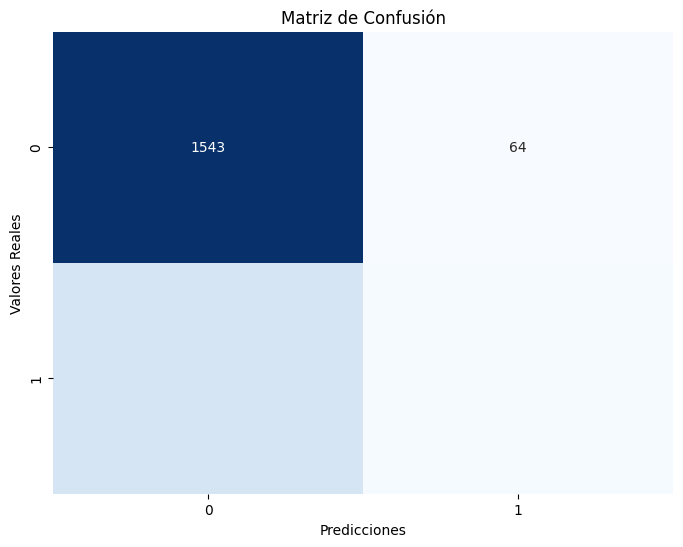

In [11]:
# Crear una matriz de confusión visual
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

### Visualización de la Curva ROC

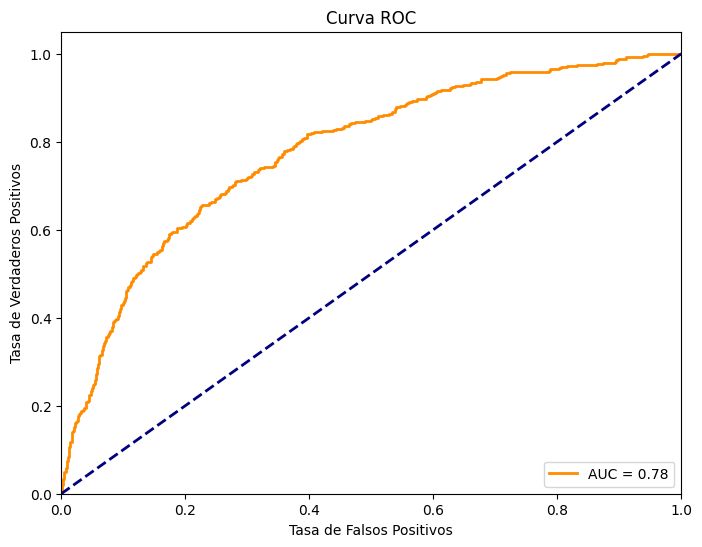

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular probabilidades de clase
y_probs = model.predict_proba(X_test_preprocessed)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_probs)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Visualización de los Resultados de la Predicción



In [14]:
# Obtener las probabilidades de abandono para cada cliente
y_probs = model.predict_proba(X_test_preprocessed)[:, 1]

# Crear un DataFrame con los resultados
clientes_probables_abandono = pd.DataFrame({'Apellido': X_test['Apellido'], 'Probabilidad_Abandono': y_probs})

# Ordenar el DataFrame por las probabilidades en orden descendente
clientes_probables_abandono = clientes_probables_abandono.sort_values(by='Probabilidad_Abandono', ascending=False)
clientes_probables_abandono

NameError: name 'clientes_probables_abandon' is not defined

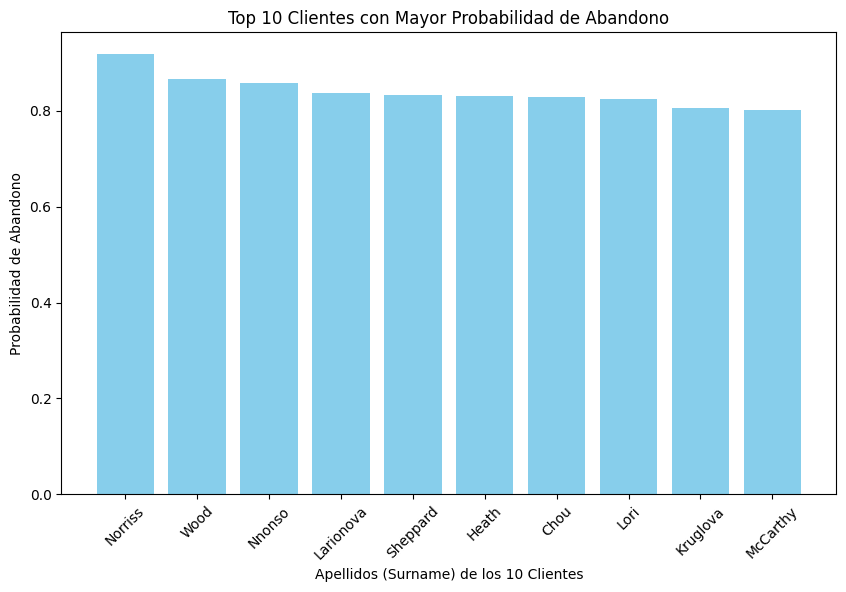

In [12]:
# Obtener las probabilidades de abandono para cada cliente
y_probs = model.predict_proba(X_test_preprocessed)[:, 1]

# Crear un DataFrame con los resultados
clientes_probables_abandono = pd.DataFrame({'Apellido': X_test['Apellido'], 'Probabilidad_Abandono': y_probs})

# Ordenar el DataFrame por las probabilidades en orden descendente
clientes_probables_abandono = clientes_probables_abandono.sort_values(by='Probabilidad_Abandono', ascending=False)
clientes_probables_abandono
# Tomar solo los primeros 10 clientes
top_10_clientes = clientes_probables_abandono.head(10)

# Crear una gráfica de barras para visualizar las probabilidades de abandono de los 10 primeros clientes
plt.figure(figsize=(10, 6))
plt.bar(top_10_clientes['Apellido'], top_10_clientes['Probabilidad_Abandono'], color='skyblue')
plt.xlabel('Apellidos (Surname) de los 10 Clientes')
plt.ylabel('Probabilidad de Abandono')
plt.title('Top 10 Clientes con Mayor Probabilidad de Abandono')
plt.xticks(rotation=45)  # Rotar los apellidos para una mejor visualización
plt.show()

## *Entrenamiento del Modelo (Bosques Aleatorios)*

### Entrenamiento

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo seleccionado (Bosques Aleatorios)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Calcular la precisión en el conjunto de prueba
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Precisión del modelo de Bosques Aleatorios en el conjunto de prueba: {accuracy_rf:.2f}')

# Mostrar un informe de clasificación
classification_report_rf = classification_report(y_test, y_pred_rf)
print('Informe de Clasificación (Bosques Aleatorios):')
print(classification_report_rf)

Precisión del modelo de Bosques Aleatorios en el conjunto de prueba: 0.86
Informe de Clasificación (Bosques Aleatorios):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### Visualización de Confusión Visual




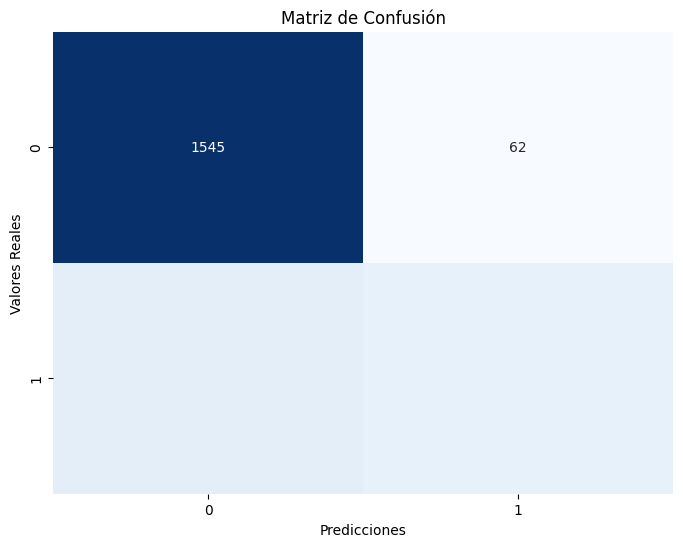

In [16]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_rf)  # Reemplaza y_pred_rf por tu variable de predicciones

# Crear una matriz de confusión visual
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


### Visualización de la Curva ROC

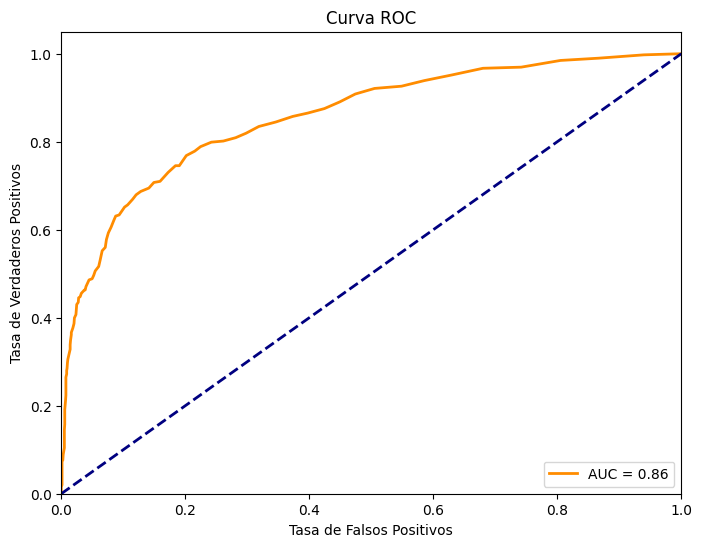

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de clase (reemplaza y_probs_rf con tus probabilidades)
y_probs_rf = rf_model.predict_proba(X_test_preprocessed)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_probs_rf)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Resultado: Top 10 clientes



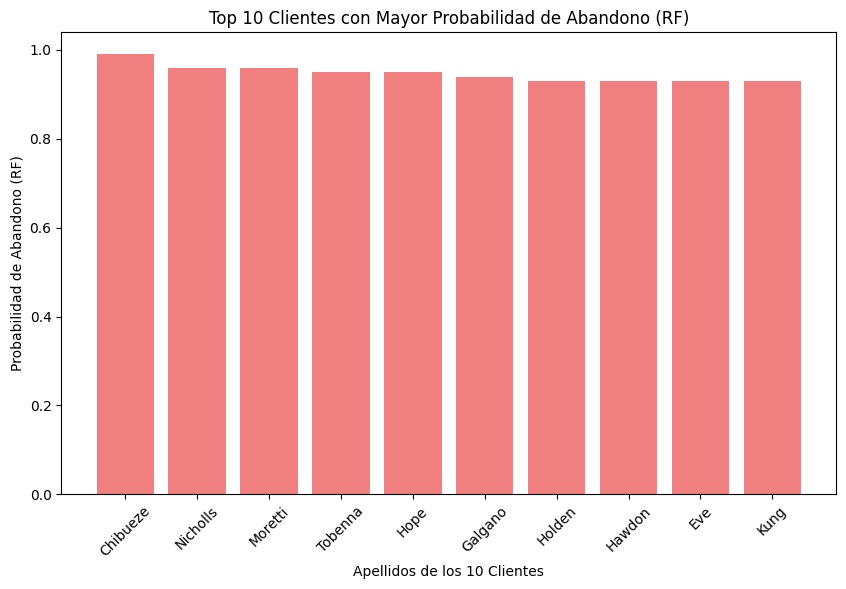

In [15]:
# Obtener las probabilidades de abandono para cada cliente utilizando el modelo de Bosques Aleatorios
y_probs_rf = rf_model.predict_proba(X_test_preprocessed)[:, 1]

# Crear un DataFrame con los resultados
clientes_probables_abandono_rf = pd.DataFrame({'Surname': X_test['Surname'], 'Probabilidad_Abandono_RF': y_probs_rf})

# Ordenar el DataFrame por las probabilidades en orden descendente
clientes_probables_abandono_rf = clientes_probables_abandono_rf.sort_values(by='Probabilidad_Abandono_RF', ascending=False)

# Tomar solo los primeros 10 clientes
top_10_clientes_rf = clientes_probables_abandono_rf.head(10)

# Crear una gráfica de barras para visualizar las probabilidades de abandono de los 10 primeros clientes con el modelo RF
plt.figure(figsize=(10, 6))
plt.bar(top_10_clientes_rf['Surname'], top_10_clientes_rf['Probabilidad_Abandono_RF'], color='lightcoral')
plt.xlabel('Apellidos de los 10 Clientes')
plt.ylabel('Probabilidad de Abandono (RF)')
plt.title('Top 10 Clientes con Mayor Probabilidad de Abandono (RF)')
plt.xticks(rotation=45)  # Rotar los apellidos para una mejor visualización
plt.show()

### *Resultado: El top que el usuario pida*

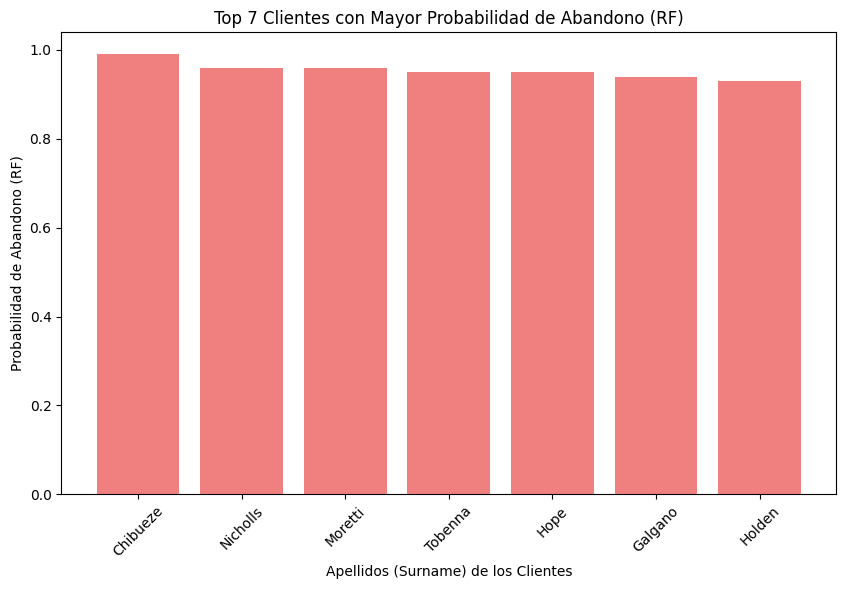

In [19]:
#QUE EL USUARIO PIDA EL TOP X DE LA CANTIDAD QUE DESEA VER
# Solicitar al usuario la cantidad de clientes que desea ver
cantidad_clientes_a_mostrar = int(input("Ingrese la cantidad de clientes que desea ver: "))

# Validar que la cantidad ingresada sea válida
if cantidad_clientes_a_mostrar <= 0:
    print("La cantidad ingresada debe ser un número positivo.")
else:
    # Tomar solo la cantidad especificada de clientes
    top_clientes_rf = clientes_probables_abandono_rf.head(cantidad_clientes_a_mostrar)

    # Crear una gráfica de barras para visualizar las probabilidades de abandono de los clientes seleccionados con el modelo RF
    plt.figure(figsize=(10, 6))
    plt.bar(top_clientes_rf['Surname'], top_clientes_rf['Probabilidad_Abandono_RF'], color='lightcoral')
    plt.xlabel('Apellidos (Surname) de los Clientes')
    plt.ylabel('Probabilidad de Abandono (RF)')
    plt.title(f'Top {cantidad_clientes_a_mostrar} Clientes con Mayor Probabilidad de Abandono (RF)')
    plt.xticks(rotation=45)  # Rotar los apellidos para una mejor visualización
    plt.show()

### Comparativa de Ambos Modelos

In [17]:
# Calcular las probabilidades de abandono para cada cliente (Regresión Logística)
y_probs = logistic_model.predict_proba(X_test_preprocessed)[:, 1]

# Crear un DataFrame con los resultados (Regresión Logística)
clientes_probables_abandono = pd.DataFrame({'Surname': X_test['Surname'], 'Probabilidad_Abandono': y_probs})

# Ordenar el DataFrame por las probabilidades en orden descendente (Regresión Logística)
clientes_probables_abandono = clientes_probables_abandono.sort_values(by='Probabilidad_Abandono', ascending=False)

# Tomar solo los primeros 10 clientes (Regresión Logística)
top_10_clientes = clientes_probables_abandono.head(10)

# Calcular las probabilidades de abandono para cada cliente (Bosques Aleatorios)
y_probs_rf = rf_model.predict_proba(X_test_preprocessed)[:, 1]

# Crear un DataFrame con los resultados (Bosques Aleatorios)
clientes_probables_abandono_rf = pd.DataFrame({'Surname': X_test['Surname'], 'Probabilidad_Abandono_RF': y_probs_rf})

# Ordenar el DataFrame por las probabilidades en orden descendente (Bosques Aleatorios)
clientes_probables_abandono_rf = clientes_probables_abandono_rf.sort_values(by='Probabilidad_Abandono_RF', ascending=False)

# Tomar solo los primeros 10 clientes (Bosques Aleatorios)
top_10_clientes_rf = clientes_probables_abandono_rf.head(10)

# Calcular las probabilidades de abandono para cada cliente (Regresión Logística - ROC)
y_probs_logistic_roc = model.predict_proba(X_test_preprocessed)[:, 1]

# Crear un DataFrame con los resultados (Regresión Logística - ROC)
clientes_probables_abandono_logistic_roc = pd.DataFrame({'Surname': X_test['Surname'], 'Probabilidad_Abandono_Logistic_ROC': y_probs_logistic_roc})

# Ordenar el DataFrame por las probabilidades en orden descendente (Regresión Logística - ROC)
clientes_probables_abandono_logistic_roc = clientes_probables_abandono_logistic_roc.sort_values(by='Probabilidad_Abandono_Logistic_ROC', ascending=False)

# Tomar solo los primeros 10 clientes (Regresión Logística - ROC)
top_10_clientes_logistic_roc = clientes_probables_abandono_logistic_roc.head(10)

plt.figure(figsize=(15, 8))

# Gráfica de los 10 clientes con mayor probabilidad de abandono (Regresión Logística)
plt.subplot(1, 3, 1)
plt.bar(top_10_clientes['Surname'], top_10_clientes['Probabilidad_Abandono'], color='skyblue')
plt.xlabel('Apellidos (Surname) de los 10 Clientes')
plt.ylabel('Probabilidad de Abandono (Regresión Logística)')
plt.title('Top 10 Clientes (Regresión Logística)')
plt.xticks(rotation=45)

# Gráfica de los 10 clientes con mayor probabilidad de abandono (Bosques Aleatorios)
plt.subplot(1, 3, 2)
plt.bar(top_10_clientes_rf['Surname'], top_10_clientes_rf['Probabilidad_Abandono_RF'], color='lightcoral')
plt.xlabel('Apellidos (Surname) de los 10 Clientes')
plt.ylabel('Probabilidad de Abandono (Bosques Aleatorios)')
plt.title('Top 10 Clientes (Bosques Aleatorios)')
plt.xticks(rotation=45)

# Gráfica de los 10 clientes con mayor probabilidad de abandono (Regresión Logística - ROC)
plt.subplot(1, 3, 3)
plt.bar(top_10_clientes_logistic_roc['Surname'], top_10_clientes_logistic_roc['Probabilidad_Abandono_Logistic_ROC'], color='lightgreen')
plt.xlabel('Apellidos (Surname) de los 10 Clientes')
plt.ylabel('Probabilidad de Abandono (Regresión Logística - ROC)')
plt.title('Top 10 Clientes (Regresión Logística - ROC)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




NameError: name 'model' is not defined

## *Ajustes de Hiperparámetros y Validación Cruzada*

### Ajustes de Hiperparámetros

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(50, 200),  # Número de árboles en el bosque
    'max_depth': randint(2, 20),       # Profundidad máxima de los árboles
    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': randint(1, 20),   # Número mínimo de muestras requeridas en cada hoja
    'bootstrap': [True, False]          # Muestreo con reemplazo o no
}

# Crear un modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento con validación cruzada
random_search.fit(X_train_preprocessed, y_train)

# Mostrar los mejores hiperparámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)


Mejores hiperparámetros encontrados:
{'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 64}


### Validacion Cruzada

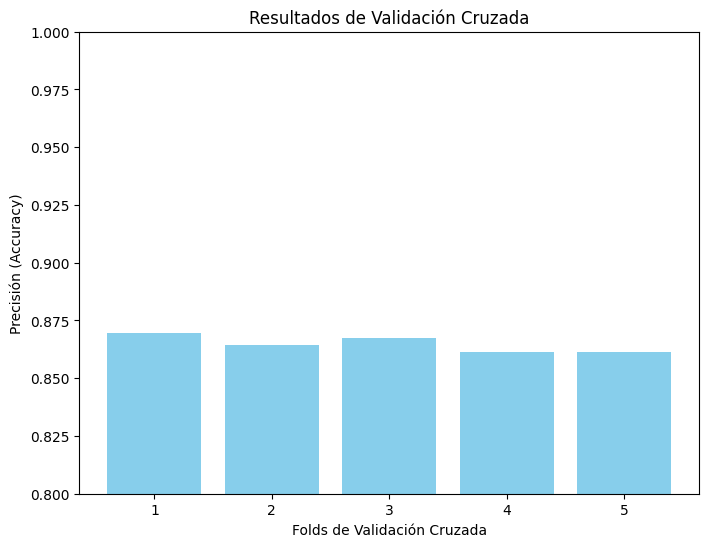

Precisión Promedio de Validación Cruzada: 0.86


In [22]:
from sklearn.model_selection import cross_val_score

# Obtener el mejor modelo de la búsqueda aleatoria de hiperparámetros
best_rf_model = random_search.best_estimator_

# Realizar validación cruzada para evaluar el rendimiento del modelo
cv_scores = cross_val_score(best_rf_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados de validación cruzada en un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores, color='skyblue')
plt.xlabel('Folds de Validación Cruzada')
plt.ylabel('Precisión (Accuracy)')
plt.title('Resultados de Validación Cruzada')
plt.xticks(range(1, 6))
plt.ylim([0.8, 1.0])  # Ajustar límites del eje y para una mejor visualización
plt.show()

# Mostrar la precisión promedio de la validación cruzada
average_cv_accuracy = cv_scores.mean()
print(f'Precisión Promedio de Validación Cruzada: {average_cv_accuracy:.2f}')


### Guardar el modelo

In [23]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(rf_model, 'modelo_rf.pkl')

# Indicar la ubicación del archivo
ruta_archivo = 'modelo_rf.pkl'

# Imprimir la ubicación del archivo
print(f"El modelo se ha guardado en: {ruta_archivo}")


El modelo se ha guardado en: modelo_rf.pkl
